In [1]:
%%capture
cd ~/Dropbox/Msci-DustyPlasmas/Code

## Import dependencies

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')

In [3]:
from IPython.display import HTML

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from analysis_ion import IonAnalysis
from plots.ionplots import *
from utils.utils import bootstrap
from plots import ionplots

from IPython import get_ipython
import constants as const

In [6]:
# Define constants wanted for analysis
tau = 10**(-5)
omega = const.e*0.014/const.mi

ioneffect1 = IonAnalysis(tau=tau,omega=omega)

# Analysis old drift from long runs of different $\omega*\tau$ for time = 3s

100%|██████████| 11/11 [00:00<00:00, 5327.02it/s]
/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


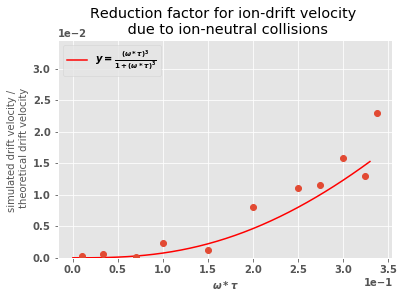

In [7]:
plotolddrifts(fontsize=10, figsize0=20, figsize1=10)
